<a href="https://colab.research.google.com/github/zilioalberto/Ciencia_De_Dados_Aula_08/blob/main/Ciencia_De_Dados_Aula_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alunos:
## Alberto Zilio
## Roni Pereira
# Disciplina: Ciencia de Dados
# Aula 08


In [14]:
#Bibliotecas

!pip install -q pandas seaborn matplotlib openpyxl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report







In [3]:
## Passo 00 - Carregamento e Diagnóstic0

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 120)

# Caminhos
CAMINHO_LOCAL = "/content/Telco-Customer-Churn.csv"
URL_RAW = "https://raw.githubusercontent.com/zilioalberto/Ciencia_De_Dados_Aula_08/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Carregar
if os.path.exists(CAMINHO_LOCAL):
    df_churn = pd.read_csv(CAMINHO_LOCAL, low_memory=False)
else:
    df_churn = pd.read_csv(URL_RAW, low_memory=False)

# Tratamentos básicos recomendados pelo enunciado:
# - TotalCharges pode ter espaços -> converter para número (coercion vira NaN onde houver lixo)
if "TotalCharges" in df_churn.columns:
    df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors="coerce")

# Diagnóstico rápido
print("Dimensão:", df_churn.shape)
print("\n=== .info() ===")
df_churn.info()

print("\n=== .describe(numéricas) ===")
display(df_churn.select_dtypes(include="number").describe().T)

print("\n=== Primeiras linhas ===")
display(df_churn.head())

print("\n=== Valores ausentes (contagem) ===")
missing = df_churn.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

Dimensão: (7043, 21)

=== .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80



=== Primeiras linhas ===


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



=== Valores ausentes (contagem) ===


,0
TotalCharges,11


In [10]:
# Passo 01 - Seleção de Features e Codificação

# Features promissoras (conclusão da EDA da Aula 07)
features_selecionadas = [
    'tenure',           # tempo de contrato
    'MonthlyCharges',   # cobrança mensal
    'Contract',         # tipo de contrato
    'InternetService',  # tipo de internet
    'Partner',          # possui parceiro
    'PaymentMethod'     # forma de pagamento
]

# Target
target = 'Churn'

# Separar X e y
X = df_churn[features_selecionadas]
y = df_churn[target]

print("Dimensão de X:", X.shape)
print("Dimensão de y:", y.shape)

print("\nExemplo de X (5 primeiras linhas):")
display(X.head())

print("\nExemplo de y (5 primeiras linhas):")
display(y.head())


Dimensão de X: (7043, 6)
Dimensão de y: (7043,)

Exemplo de X (5 primeiras linhas):


,tenure,MonthlyCharges,Contract,InternetService,Partner,PaymentMethod
0,1,29.85,Month-to-month,DSL,Yes,Electronic check
1,34,56.95,One year,DSL,No,Mailed check
2,2,53.85,Month-to-month,DSL,No,Mailed check
3,45,42.30,One year,DSL,No,Bank transfer (automatic)
4,2,70.70,Month-to-month,Fiber optic,No,Electronic check



Exemplo de y (5 primeiras linhas):


,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [11]:
# Passo 02 - Codificação de Variáveis Categóricas (One-Hot Encoding)

# Remover linhas com NaN nas features selecionadas
cols_needed = X.columns.tolist()
mask_na = X[cols_needed].isna().any(axis=1)
if mask_na.any():
    print(f"Atenção: {mask_na.sum()} linhas com NaN nas features selecionadas serão removidas.")
    X = X.loc[~mask_na].copy()
    y = y.loc[X.index].copy()

# Codificação one-hot (0/1) nas categóricas
X_encoded = pd.get_dummies(X, drop_first=True, dtype=int)

print("--- Dimensões de X antes e depois do get_dummies ---")
print(f"Formato original de X: {X.shape}")
print(f"Formato de X codificado: {X_encoded.shape}")

print("\n--- Colunas geradas (exemplo das 20 primeiras) ---")
print(list(X_encoded.columns)[:20])

print("\n--- Amostra (5 primeiras linhas) ---")
display(X_encoded.head())


--- Dimensões de X antes e depois do get_dummies ---
Formato original de X: (7043, 6)
Formato de X codificado: (7043, 10)

--- Colunas geradas (exemplo das 20 primeiras) ---
['tenure', 'MonthlyCharges', 'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'InternetService_No', 'Partner_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

--- Amostra (5 primeiras linhas) ---


,tenure,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,0,0,1,0,1,0
1,34,56.95,1,0,0,0,0,0,0,1
2,2,53.85,0,0,0,0,0,0,0,1
3,45,42.30,1,0,0,0,0,0,0,0
4,2,70.70,0,0,1,0,0,0,1,0


In [13]:
# === BLOCO 2 — DIVISÃO TREINO/TESTE (Aula 08 / Parte 2) ====================


# 70% treino / 30% teste; estratificar para manter proporção de classes
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y  # mantém a proporção Yes/No nos dois conjuntos
)

print(f"Tamanho do conjunto de treino (X_train): {X_train.shape[0]} clientes")
print(f"Tamanho do conjunto de teste  (X_test) : {X_test.shape[0]} clientes")

print("\nProporção de Churn no y_train:")
print(y_train.value_counts(normalize=True).rename("proporção"))

print("\nProporção de Churn no y_test:")
print(y_test.value_counts(normalize=True).rename("proporção"))


Tamanho do conjunto de treino (X_train): 4930 clientes
Tamanho do conjunto de teste  (X_test) : 2113 clientes

Proporção de Churn no y_train:
Churn
No     0.734686
Yes    0.265314
Name: proporção, dtype: float64

Proporção de Churn no y_test:
Churn
No     0.734501
Yes    0.265499
Name: proporção, dtype: float64


Modelo de Árvore de Decisão treinado com sucesso!

Acurácia no conjunto de teste: 78.04%
Acurácia baseline (sempre prever classe majoritária): 73.47%

=== Classification Report (teste) ===
              precision    recall  f1-score   support

          No      0.812     0.912     0.859      1552
         Yes      0.631     0.415     0.501       561

    accuracy                          0.780      2113
   macro avg      0.722     0.664     0.680      2113
weighted avg      0.764     0.780     0.764      2113


=== Matriz de Confusão (teste) ===


,pred_No,pred_Yes
real_No,1416,136
real_Yes,328,233



=== Importâncias das Features (top 12) ===


,0
tenure,0.483529
InternetService_Fiber optic,0.358522
InternetService_No,0.045815
Contract_Two year,0.036402
MonthlyCharges,0.034714
PaymentMethod_Electronic check,0.027930
Contract_One year,0.010288
PaymentMethod_Credit card (automatic),0.002799
Partner_Yes,0.000000
PaymentMethod_Mailed check,0.000000


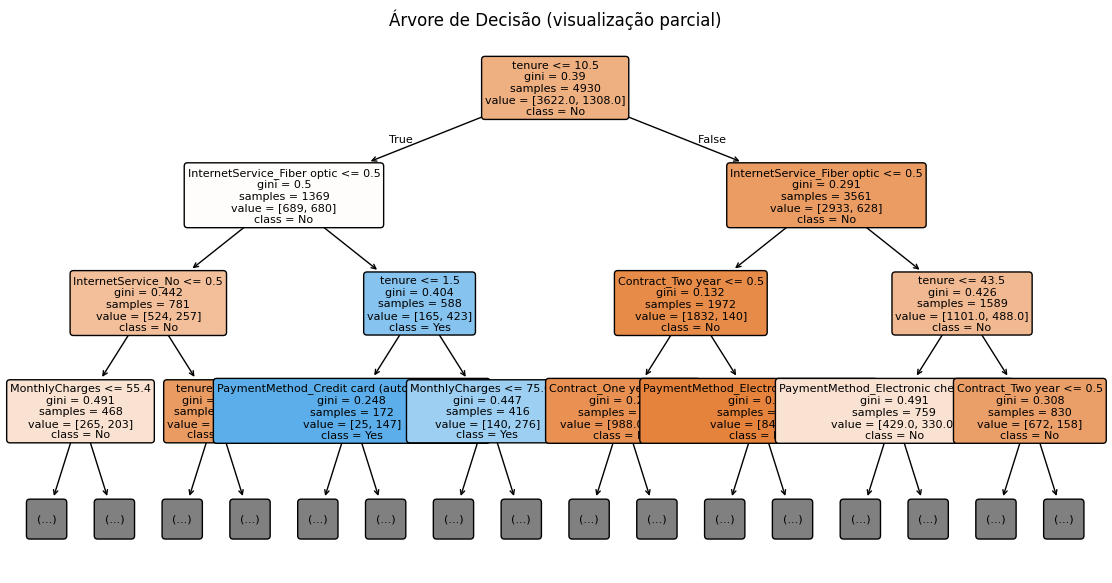

In [16]:
# === BLOCO 3 — MODELAGEM E AVALIAÇÃO (Aula 08 / Parte 3) ===================

# 1) Instanciar o modelo
# max_depth=4 controla a complexidade e ajuda a evitar overfitting
modelo_arvore = DecisionTreeClassifier(max_depth=4, random_state=42)

# 2) Treinar
modelo_arvore.fit(X_train, y_train)
print("Modelo de Árvore de Decisão treinado com sucesso!")

# 3) Prever em teste
y_pred = modelo_arvore.predict(X_test)

# 4) Avaliar
acc = accuracy_score(y_test, y_pred)
print(f"\nAcurácia no conjunto de teste: {acc:.2%}")

# (opcional) baseline: sempre prever a classe majoritária do treino
baseline = y_train.value_counts(normalize=True).max()
print(f"Acurácia baseline (sempre prever classe majoritária): {baseline:.2%}")

# Métricas detalhadas
print("\n=== Classification Report (teste) ===")
print(classification_report(y_test, y_pred, digits=3))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
cm_df = pd.DataFrame(cm, index=[f"real_{c}" for c in np.unique(y_test)],
                        columns=[f"pred_{c}" for c in np.unique(y_test)])
print("\n=== Matriz de Confusão (teste) ===")
display(cm_df)

# Importâncias de features
importancias = pd.Series(modelo_arvore.feature_importances_, index=X_train.columns)
importancias = importancias.sort_values(ascending=False)
print("\n=== Importâncias das Features (top 12) ===")
display(importancias.head(12))

# Visualizar a árvore (compacta)
plt.figure(figsize=(14,7))
plot_tree(
    modelo_arvore,
    feature_names=X_train.columns,
    class_names=sorted(y_train.unique()),
    filled=True,
    rounded=True,
    max_depth=3,         # mostra só os 3 primeiros níveis para leitura
    fontsize=8
)
plt.title("Árvore de Decisão (visualização parcial)")
plt.show()


,max_depth,acc_train,acc_test
0,2,0.787018,0.780880
1,3,0.787018,0.780880
2,4,0.791278,0.780407
3,5,0.802028,0.783247
4,6,0.809736,0.778987
5,7,0.819473,0.775674
6,8,0.830426,0.767629
7,9,0.845842,0.769049
8,10,0.860446,0.761003
9,11,0.879716,0.761003


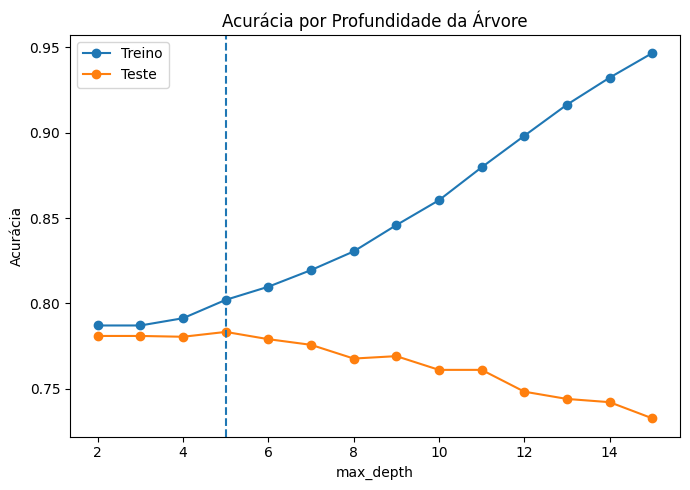

=== Conclusão automática sobre max_depth ===
Melhor max_depth (teste) = 5  |  acc_treino = 80.20%  |  acc_teste = 78.32%
Observação: diferença pequena entre treino e teste. A profundidade escolhida parece razoável para generalização.

Modelo reajustado com max_depth=5: acurácia de teste = 78.32%


In [17]:
# === BLOCO 4 — BUSCA DE max_depth + GRÁFICO + CONCLUSÃO ====================

# Garantir que X_train, X_test, y_train, y_test já existam (Bloco 2)
assert 'X_train' in globals() and 'X_test' in globals(), "Execute o Bloco 2 antes."
assert 'y_train' in globals() and 'y_test' in globals(), "Execute o Bloco 2 antes."

# 1) Varredura de profundidade
resultados = []
depths = range(2, 16)  # você pode ajustar o intervalo
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    acc_tr = accuracy_score(y_train, clf.predict(X_train))
    acc_te = accuracy_score(y_test,  clf.predict(X_test))
    resultados.append((d, acc_tr, acc_te))

df_depth = pd.DataFrame(resultados, columns=['max_depth','acc_train','acc_test'])
display(df_depth)

# 2) Identificar o melhor max_depth em teste
idx_best = df_depth['acc_test'].idxmax()
best_depth = int(df_depth.loc[idx_best, 'max_depth'])
best_acc_test = float(df_depth.loc[idx_best, 'acc_test'])
best_acc_train = float(df_depth.loc[idx_best, 'acc_train'])
gap = best_acc_train - best_acc_test  # sinal de possível overfitting se muito alto

# 3) Plotar as curvas de acurácia (sem estilos/cores personalizados)
plt.figure(figsize=(7,5))
plt.plot(df_depth['max_depth'], df_depth['acc_train'], marker='o', label='Treino')
plt.plot(df_depth['max_depth'], df_depth['acc_test'],  marker='o', label='Teste')
plt.axvline(best_depth, linestyle='--')  # marca o melhor depth
plt.xlabel('max_depth')
plt.ylabel('Acurácia')
plt.title('Acurácia por Profundidade da Árvore')
plt.legend()
plt.tight_layout()
plt.show()

# 4) Conclusão automática
print("=== Conclusão automática sobre max_depth ===")
print(f"Melhor max_depth (teste) = {best_depth}  |  acc_treino = {best_acc_train:.2%}  |  acc_teste = {best_acc_test:.2%}")

# Heurística simples para comentar o gap
if gap >= 0.08:
    print("Observação: grande diferença entre treino e teste sugere overfitting. Considere reduzir a profundidade,")
    print("usar min_samples_leaf maior, ou comparar com outros modelos (ex.: Logistic/RandomForest).")
elif gap >= 0.03:
    print("Observação: diferença moderada entre treino e teste. Aprofundar pode não generalizar melhor; avalie F1/Recall da classe Yes.")
else:
    print("Observação: diferença pequena entre treino e teste. A profundidade escolhida parece razoável para generalização.")

# 5) Reajustar o modelo principal com o melhor depth e reportar acurácia
modelo_arvore_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
modelo_arvore_best.fit(X_train, y_train)
acc_best = accuracy_score(y_test, modelo_arvore_best.predict(X_test))
print(f"\nModelo reajustado com max_depth={best_depth}: acurácia de teste = {acc_best:.2%}")
